<a href="https://colab.research.google.com/github/r0cd7b/DSAC/blob/master/Lab0_Tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 2.0

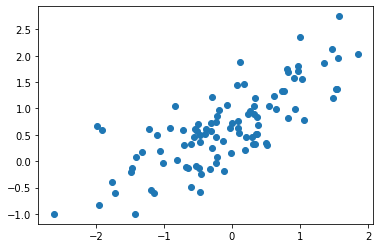

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

n = 100
np.random.seed(42)
x = np.random.randn(n)
y = 0.7 * x + 0.7  # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

plt.scatter(x, y)

0.694575 0.71547985


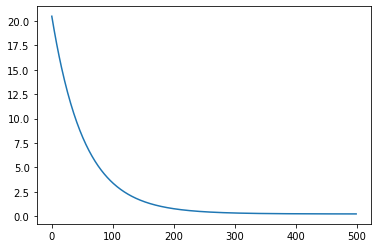

In [2]:
w, b = tf.Variable(5.0), tf.Variable(-1.0)

loss_history = []
learning_rate = 0.01
for i in range(500):
  y_pred = w * x + b
  cost = tf.reduce_mean(tf.square(y_pred - y))

  w_grad = tf.reduce_mean((y_pred - y) * x)
  b_grad = tf.reduce_mean(y_pred - y)

  w.assign_sub(learning_rate * w_grad)
  b.assign_sub(learning_rate * b_grad)

  loss_history.append(cost)

print(w.numpy(), b.numpy())
plt.plot(loss_history)

0.6295519 0.704174


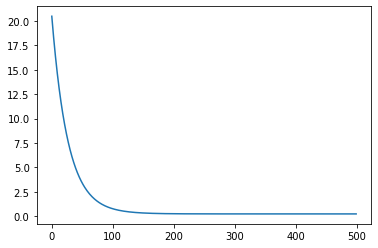

In [3]:
w, b = tf.Variable(5.0), tf.Variable(-1.0)

loss_history = []
learning_rate = 0.01
for i in range(500):
  with tf.GradientTape() as tape:
    y_pred = w * x + b
    cost = tf.reduce_mean(tf.square(y_pred - y))

  w_grad, b_grad = tape.gradient(cost, [w, b])
  # w_grad = tf.reduce_mean((y_pred - y) * x)
  # b_grad = tf.reduce_mean(y_pred - y)

  w.assign_sub(learning_rate * w_grad)
  b.assign_sub(learning_rate * b_grad)

  loss_history.append(cost)

print(w.numpy(), b.numpy())
plt.plot(loss_history)

## Linear Regression using Keras

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.optimizers import SGD

In [12]:
n = 1000
np.random.seed(42)
x = np.random.randn(n)
y = 0.7 * x + 0.7  # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='linear'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.1), loss=['mse'], metrics='mae')
history = model.fit(x, y, epochs=300, verbose=0)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


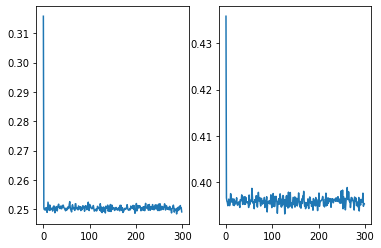

In [13]:
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"])

In [14]:
model = Sequential()
model.add(Dense(2, input_shape=(1,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.1), loss=['mse'], metrics='mae')
history = model.fit(x, y, epochs=1000, verbose=0)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


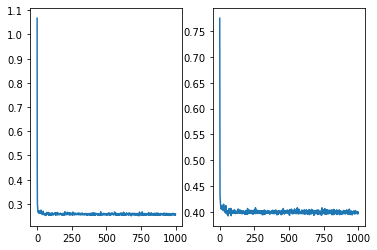

In [15]:
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"])

# Classification with keras

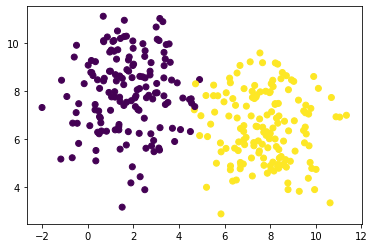

In [20]:
from sklearn.datasets import make_blobs

n = 300
(x, y) = make_blobs(n_samples=n, n_features=2, centers=2, cluster_std=1.5, random_state=20)

plt.scatter(x[:, 0], x[:, 1], c=y)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


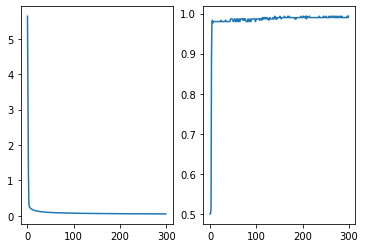

In [32]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.009), loss=['binary_crossentropy'], metrics='accuracy')
history = model.fit(x, y, epochs=300, verbose=0)

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])

# GradientTape()

In [36]:
x = tf.constant(3.0)

with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  y = x * x
  z = y * y

dz_dx = tape.gradient(z, x)
dy_dx = tape.gradient(y, x)

dz_dx, dy_dx

(<tf.Tensor: shape=(), dtype=float32, numpy=108.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [38]:
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_API_MODULE',
 '_LazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__operators__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_compat',
 '_current_file_location',
 '_current_module',
 '_distutils',
 '_division',
 '_estimator_module',
 '_fi',
 '_inspect',
 '_ll',
 '_logging',
 '_main_dir',
 '_major_api_version',
 '_module_dir',
 '